<b>Exercise 1</b> <i>Project</i>

The Pott's model is a generalization of the Ising model which was originally intended for models of two states of spin in a given lattice of "d" dimension. The Ising model was first used to study the theory of ferromagnetism. The Pott's model like the Ising model is used to find critical temperature points in a system making the one-dimensional Pott's model more appealing because you can find the critical points mathematically. 

However, once you go into 2 dimensions you can only solve these numerically and with computers. Where the 2D case is generalizing the Ising model. The most relevant equations I have found for this model are as follows:

$$\Theta_n=(2*\pi*n)/q$$ ; The Hamiltonian interaction between neighbors $$H=-J(\theta_{ij})$$ where $$\theta_{ij}$$ is the angle between two neighboring vectors written as $$J(\theta{ij})=-\epsilon_1cos\theta$$

This leads us to finding the critical point for all q written as $$J(\theta{ij})=-\epsilon_2\delta_{K,r}(n_i,n_j)$$

<b>Exercise 2</b> <i>Planetary orbits</i>

Text(0.5, 1.0, 'Earths orbit: Alternativly a Large Egg')

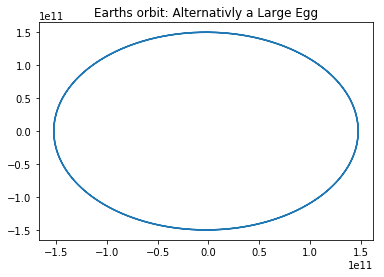

In [1]:
#Kaleb Kuatzsch
#Part (i) See picture

#Part (ii)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G
import numpy.linalg as la

X0 = 1.4710e11 # distance= 1.4710×10^11 m from the Sun at perihelion defined at (x0,y0)
Y0 = 0 
Vx0 = 0 
Vy0 = 3.0287e4 #velocity at perihelion (Vx0,Vy0)              
M = 1.9891e30  # Mass of the sun

# definition of the ODE as vector function
def f(A,t):
    # x and y are vector elements
    x = A[0]
    y = A[1]
    r = [x,y]
    vx = A[2]
    vy = A[3]
    dx = vx
    dVx = -G*M*x/(la.norm(r)**3)
    dy = vy
    dVy = -G*M*y/(la.norm(r)**3)
    return np.array([dx,dy,dVx,dVy],float)

start = 0.0
end = 6.307e7 #number of seconds in two years
numSteps = 1000
stepSize = (end-start)/numSteps
tpoints = np.arange(start,end,stepSize)
A = np.array([X0,Y0,Vx0,Vy0],float)

x = []
y = []

for t in tpoints:
    x.append(A[0])
    y.append(A[1])
    k1 = stepSize*f(A,t)        
    k2 = stepSize*f(A+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(A+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(A+k3,t+stepSize)
    A += (k1+2.*k2+2.*k3+k4)/6
    
plt.plot(x,y)
plt.title("Earths orbit: Alternativly a Large Egg")

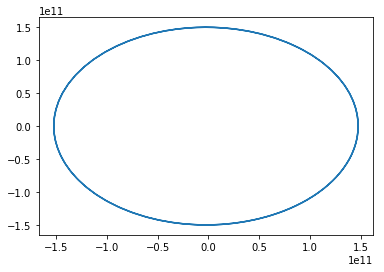

In [20]:
#Kaleb Kautzsch
#Part (iii)
from scipy.integrate import solve_ivp

def f_mod(t, A):
    return f(A, t)

initial = np.array([X0,Y0,Vx0,Vy0],float)
sol = solve_ivp(f_mod, (start, end), initial, method='RK45', rtol=1e-8)


plt.plot(sol.y[0], sol.y[1])

Text(0.5,1,'Earths orbit: Alternativly a Large Egg')

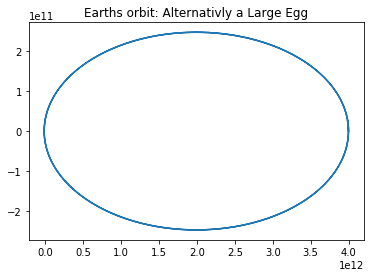

In [28]:
#Kaleb Kautzsch
#Part (iiii)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G
import numpy.linalg as la

X0 = 4e12 # distance= 1.4710×10^11 m from the Sun at perihelion defined at (x0,y0)
Y0 = 0 
Vx0 = 0 
Vy0 = 500 #velocity at perihelion (Vx0,Vy0)              
M = 1.9891e30  # Mass of the sun

# definition of the ODE as vector function
def f(A,t):
    # x and y are vector elements
    x = A[0]
    y = A[1]
    r = [x,y]
    vx = A[2]
    vy = A[3]
    dx = vx
    dVx = -G*M*x/(la.norm(r)**3)
    dy = vy
    dVy = -G*M*y/(la.norm(r)**3)
    return np.array([dx,dy,dVx,dVy],float)

start = 0.0
end = 50*6.307e7 #number of seconds in two years
numSteps = 200000
stepSize = (end-start)/numSteps
tpoints = np.arange(start,end,stepSize)
A = np.array([X0,Y0,Vx0,Vy0],float)

x = []
y = []

for t in tpoints:
    x.append(A[0])
    y.append(A[1])
    k1 = stepSize*f(A,t)        
    k2 = stepSize*f(A+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(A+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(A+k3,t+stepSize)
    A += (k1+2.*k2+2.*k3+k4)/6
    
plt.plot(x,y)
plt.title("Earths orbit: Alternativly a Large Egg")

In [7]:
#Kaleb Kautzsch
#Exercise 3
#Code Adapted from last weeks lab

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar, m_e, e
from scipy.integrate import simps
from numpy import sqrt, square

V0 = 50*e
a = 1e-11
X = 5 

L = 5.2917721e-11     

Y =[]


numSteps = 500
stepSize = 2*X*a/numSteps


def V(x):
    return V0*x**4/a**4


def f(r,x,E):
    psi = r[0]
    phi = r[1]    
    fpsi = phi   
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)


def solve(E):
    global Y
    psi = 0.0
    phi = 1.0    
    r = np.array([psi,phi],float)
    Y=[]

    for x in np.arange(-X*a,X*a,stepSize):
        Y.append(r[0])
        k1 = stepSize*f(r,x,E)
        k2 = stepSize*f(r+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f(r+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f(r+k3,x+stepSize,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]


E11 = 0.0
E12 = e
# 1st excited
E21 = e
E22 = 700*e
# 2nd excited
E31 = 700*e
E32 = 1400*e

psi2 = solve(E11)
psi3 = solve(E21)
psi4 = solve(E31)

target = e/1000
while abs(E11-E12)>target:
    psi1, psi2 = psi2, solve(E12)
    E11, E12 = E12, E12-psi2*(E12-E11)/(psi2-psi1)

# Eground = E2

print("E ground=",E12/e,"eV")

wfGround=Y

E ground= 205.30182762352732 eV


In [3]:
while abs(E21-E22)>target:
    psi1, psi3 = psi3, solve(E22)
    E21, E22 = E22, E22-psi3*(E22-E21)/(psi3-psi1)
    
# Efirst = E3    

print("E 1st excited=",E22/e,"eV")
wf1=Y

E 1st excited= 735.6730591781931 eV


In [4]:
while abs(E31-E32)>target:
    psi1, psi4 = psi4, solve(E32)
    E31, E32 = E32, E32-psi4*(E32-E31)/(psi4-psi1)

# Ethird = E4
    
print("E 2nd excited=",E32/e,"eV")
wf2=Y

E 2nd excited= 1443.533733115482 eV


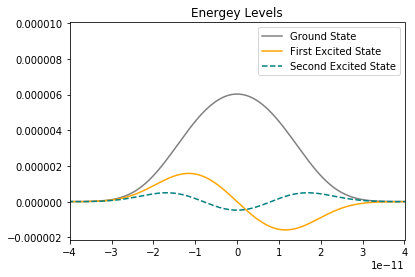

In [8]:
x1 = np.arange(-X*a,X*a,stepSize)

plt.plot(x1,wfGround, label='Ground State',color='grey')
plt.plot(x1,wf1, label='First Excited State',color='orange')
plt.plot(x1,wf2,'--', label='Second Excited State',color='teal')

plt.xlim(-4e-11,4e-11)
plt.title('Energey Levels')
plt.legend()

(-4e-11, 4e-11)

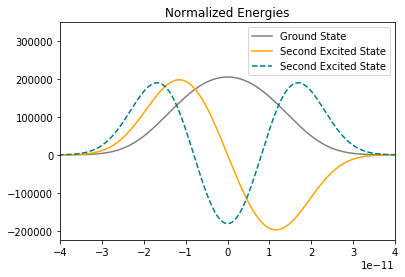

In [9]:
int1 = simps(square(wfGround),x1)
int2 = simps(square(wf1),x1)
int3 = simps(square(wf2),x1)

norm1 = wfGround/sqrt(int1)
norm2 = wf1/sqrt(int2)
norm3 = wf2/sqrt(int3)

plt.plot(x1,norm1, label='Ground State', color='grey')
plt.plot(x1,norm2, label='Second Excited State', color='orange')
plt.plot(x1,norm3, '--', label='Second Excited State', color='teal')
plt.title('Normalized Energies')
plt.legend()

plt.xlim(-4e-11,4e-11)